In [20]:
from dataSet.reader import *
from dataSet.transform import *
from train import transform_train, train_collate, transform_valid, valid_collate

In [21]:
fold_index=1
min_num_class=1
batch_size=2

In [22]:
data_train = pd.read_csv('./WC_input/train_split_{}.csv'.format(fold_index), dtype='object')
names_train = data_train['Image'].tolist()
labels_train = data_train['Id'].tolist()
data_valid = pd.read_csv('./WC_input/valid_split_{}.csv'.format(fold_index), dtype='object')
names_valid = data_valid['Image'].tolist()
labels_valid = data_valid['Id'].tolist()
num_data = len(names_train)
dst_train = WhaleDataset(names_train, labels_train,mode='train',transform_train=transform_train, min_num_classes=min_num_class)
dataloader_train = DataLoader(dst_train, shuffle=True, drop_last=True, batch_size=batch_size, num_workers=12,
                             collate_fn=train_collate)
print(dst_train.__len__())
dst_valid = WhaleTestDataset(names_valid, labels_valid, mode='valid',transform=transform_valid)
dataloader_valid = DataLoader(dst_valid, shuffle=False, batch_size=batch_size * 2,
                             num_workers=8,
                              collate_fn=valid_collate)

loading bbox...
loading mask...
1916
loading bbox...


In [23]:
for valid_data in dataloader_valid:
    images, labels, names = valid_data

In [24]:
len(names)

4

In [25]:
images.shape

torch.Size([8, 4, 256, 512])

In [5]:
WC_PATH = 'WC_input/data/'

In [6]:
names = np.repeat(names, 2)
labels = np.repeat(labels, 2) 

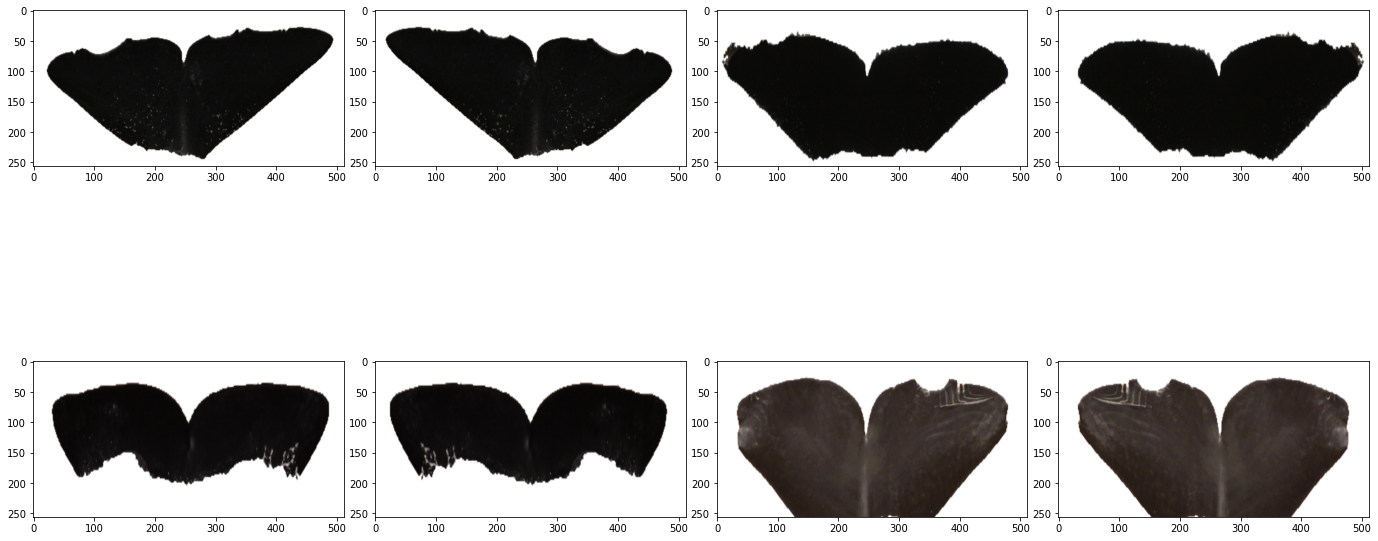

In [7]:
fig, axs = plt.subplots(2,4,figsize=(19,12))
for i, ax in enumerate(axs.flatten()):
    img = images[i].cpu().numpy()
    img = np.moveaxis(img,0,2)
    ax.imshow(img)
fig.tight_layout(pad=.1)

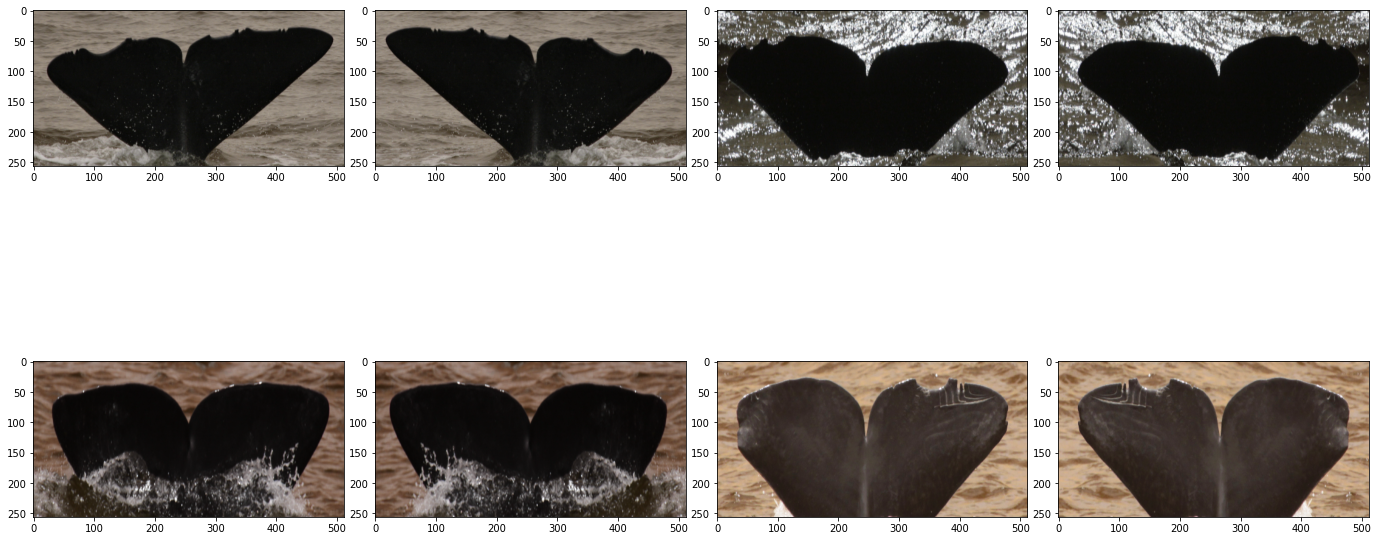

In [8]:
fig, axs = plt.subplots(2,4,figsize=(19,12))
for i, ax in enumerate(axs.flatten()):
    img = images[i].cpu().numpy()
    img = np.moveaxis(img[:3],0,2)
    ax.imshow(img)
fig.tight_layout(pad=.1)

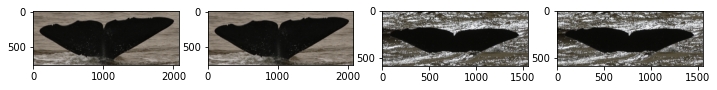

In [9]:
_, axs = plt.subplots(1,4,figsize=(12,6))
for i, ax in enumerate(axs.flatten()):
    img = cv2.imread(WC_PATH + names[i])
    ax.imshow(img)

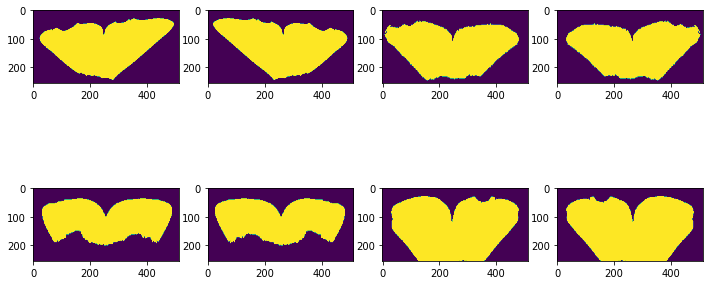

In [10]:
_, axs = plt.subplots(2,4,figsize=(12,6))
for i, ax in enumerate(axs.flatten()):
    img = images[i][3]
    ax.imshow(img,  interpolation='none')

In [11]:
img

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [12]:
train_data[0].shape

NameError: name 'train_data' is not defined

In [ ]:
train_data[1]

In [ ]:
len(train_data)

In [ ]:
train_data[0].shape

In [ ]:
labels.shape